# Virus spreading simulator 

This model simulates the virus spreading in a population. A simple compartment model is used to model the population to healthy, sick and healed individuals. The model includes quarantine, vaccination and mask features. Also lockdowns and other dynamic changes to the setup can be simulated. 

(c) Mikko Kursula, 2021, MIT License. 

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import time 
from multiprocessing import Pool

# Own files
from person import Person
from virus import Virus
from mask import Mask
from setup_sim import setup_simulation
from run_sim import run_simulation
from visuals import plot_visuals

### Quarantine effects

- Simulate the efficiency of different quarantine % levels.

Scenario 30% of sick quarantined done in 36.7 s.
Scenario 0% of sick quarantined done in 40.5 s.
Scenario 90% of sick quarantined done in 0.6 s.
Scenario 60% of sick quarantined done in 16.9 s.


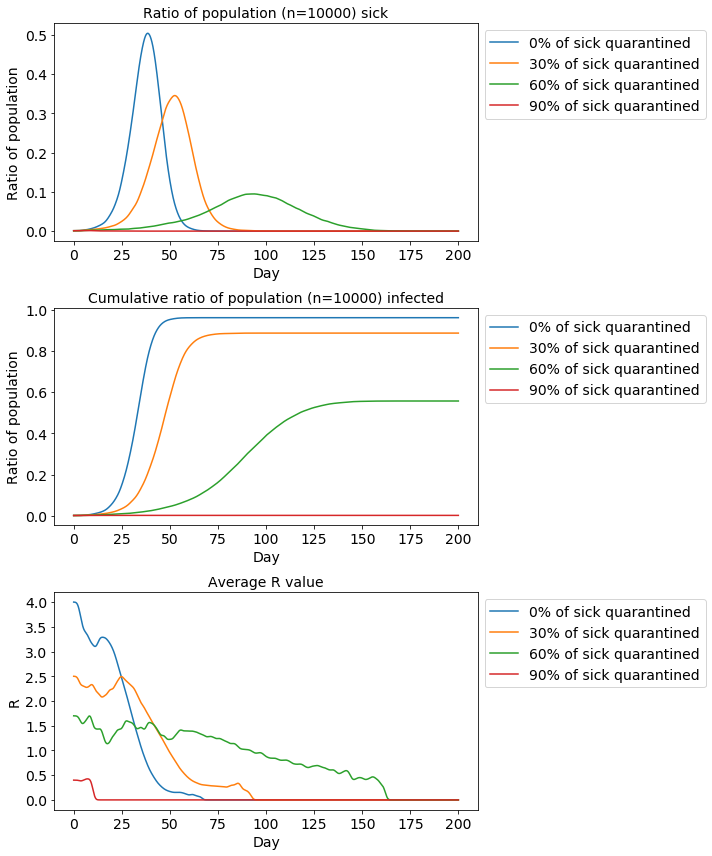

In [2]:
virus = Virus(
    name='Flu_1', 
    t_heal=240, 
    spreading_t_start=72,
    spreading_coefficient=0.1,
    infection_coefficient=0.1,
)

scenarios = []
for param in [0, 0.3, 0.6, 0.9]:
    scenario = setup_simulation(
        virus=virus, 
        n_person=10000,
        n_sick=10,
        quarantine_ratio=param,
        vaccinated_ratio=0,
        masked_ratio=0, 
        mask=None
    )
    scenario['label'] = '{:0.0f}% of sick quarantined'.format(param * 100)
    scenario['sim_hours'] = 200 * 24
    scenarios.append(scenario)

with Pool(processes=2) as pool: 
    scenarios = pool.map(run_simulation, scenarios)
    
plot_visuals(scenarios)

### Vaccination ratio effect on virus spreading 
- This tests that how the ratio of persons vaccinated will slow down the virus spreading.

Scenario 30% vaccinated done in 27.1 s.
Scenario 60% vaccinated done in 8.0 s.
Scenario 90% vaccinated done in 0.7 s.
Scenario 0% vaccinated done in 40.8 s.


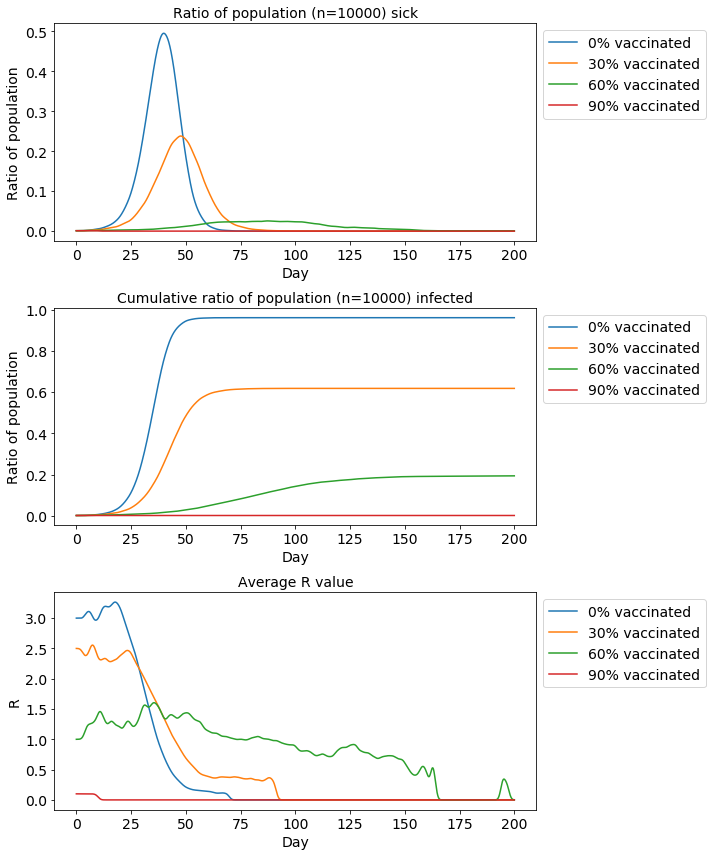

In [3]:
virus = Virus(
    name='Flu_1', 
    t_heal=240, 
    spreading_t_start=72,
    spreading_coefficient=0.1,
    infection_coefficient=0.1,
)

scenarios = []
for param in [0, 0.3, 0.6, 0.9]:
    scenario = setup_simulation(
        virus=virus, 
        n_person=10000,
        n_sick=10,
        quarantine_ratio=0,
        vaccinated_ratio=param,
        masked_ratio=0, 
        mask=None
    )
    scenario['label'] = '{:0.0f}% vaccinated'.format(param * 100)
    scenario['sim_hours'] = 200 * 24
    scenarios.append(scenario)

with Pool(processes=2) as pool: 
    scenarios = pool.map(run_simulation, scenarios)
    
plot_visuals(scenarios)

### Mask
- Simulate the effect of mask usage on the virus spreading. 

Scenario 30% masked done in 39.1 s.
Scenario 0% masked done in 41.7 s.
Scenario 90% masked done in 38.5 s.
Scenario 60% masked done in 50.8 s.


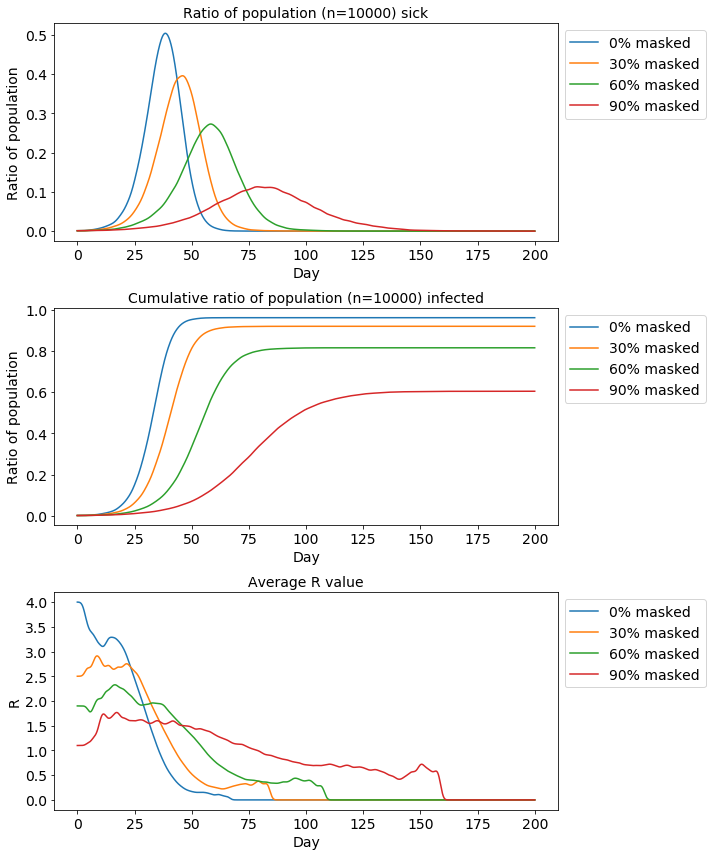

In [4]:
virus = Virus(
    name='Flu_1', 
    t_heal=240, 
    spreading_t_start=72,
    spreading_coefficient=0.1,
    infection_coefficient=0.1,
)

# Setup a weak performance mask probably similar to surgical masks
mask = Mask(inhale_filt_eff=0.2, exhale_filt_eff=0.5)

scenarios = []
for param in [0, 0.3, 0.6, 0.9]:
    scenario = setup_simulation(
        virus=virus, 
        n_person=10000,
        n_sick=10,
        quarantine_ratio=0,
        vaccinated_ratio=0,
        masked_ratio=param, 
        mask=mask
    )
    scenario['label'] = '{:0.0f}% masked'.format(param * 100)
    scenario['sim_hours'] = 200 * 24
    scenarios.append(scenario)

with Pool(processes=2) as pool: 
    scenarios = pool.map(run_simulation, scenarios)
    
plot_visuals(scenarios)

### Lockdowns
- This demonstrates the timed "callback" functions that can be used to e.g. setup lockdown during the simulation. 

Scenario Lockdown from day 20 to day 60 done in 54.0 s.
Scenario No lockdown done in 58.3 s.


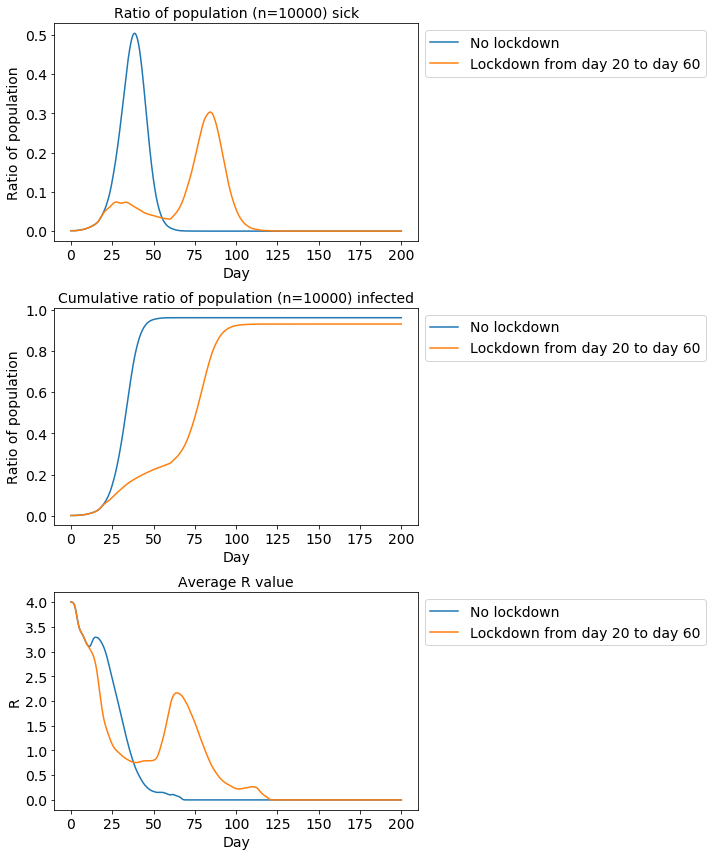

In [5]:
virus = Virus(
    name='Flu_1', 
    t_heal=240, 
    spreading_t_start=72,
    spreading_coefficient=0.1,
    infection_coefficient=0.1,
)

scenarios = []

# Create reference case with no lockdowns
scenario = setup_simulation(
    virus=virus, 
    n_person=10000,
    n_sick=10,
    quarantine_ratio=0,
    vaccinated_ratio=0,
    masked_ratio=0, 
    mask=None
)
scenario['label'] = 'No lockdown'
scenario['sim_hours'] = 200 * 24
scenarios.append(scenario)

# Create lockdown functions and the lockdown scenario
def set_lockdown(scenario : dict): 
    prob = 0.9 # Put 90% of population to lockdown
    for person in scenario['persons'].values(): 
        if np.random.rand() < prob: 
            person.lockdown = True
                
def clear_lockdown(scenario : dict): 
    for person in scenario['persons'].values(): 
        person.lockdown = False
    
scenario = setup_simulation(
    virus=virus, 
    n_person=10000,
    n_sick=10,
    quarantine_ratio=0,
    vaccinated_ratio=0,
    masked_ratio=0, 
    mask=None
)
scenario['label'] = 'Lockdown from day 20 to day 60'
scenario['sim_hours'] = 200 * 24
scenario['callbacks'].append({'trigger' : 20 * 24, 'function' : set_lockdown})
scenario['callbacks'].append({'trigger' : 60 * 24, 'function' : clear_lockdown})
scenarios.append(scenario)

with Pool(processes=2) as pool: 
    scenarios = pool.map(run_simulation, scenarios)
    
plot_visuals(scenarios)